### Logistic Regression

Logistic Regression is classification technique that learns the relationship between features and target(binary based on 2 values) to predict the likelihood of an event happening or a choice being made.

Following  the example below,the model essentially fits the training data to the sigmoid curve and helps you determine a probability of that patient has lung cancer or not depending on the feature in question which the number of cigarettes they smoked.

<p align="center">
<img src="https://i.imgur.com/QK7SVUR.png" width="500" height="300" />
</p>

Problem Statement

Using the bank marketing dataset, we will be implementing the logistic regression model, by using features such as job,marital status etc. to predict whether the client subscribed to a term deposit or not.

Features
age: age of client\
job: occupation of client\
marital: marital status\
education: level of education\
default: did the client default in the past\
balance: client's bank balance\
housing: does client own a house\
loan: does client have a loan already\
contact: contact information\
day: day of the week\
month: month of the year\
duration: loan's duration\
campaign: was the marketing campaign featured to clients\
pdays:\
previous:\
poutcome:

Target\
y: The client subscribed to a term deposit or not.

Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_score 
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,roc_curve,accuracy_score
sns.set(style='darkgrid')

In [2]:
df= pd.read_csv('/users/kunalramchurn/Desktop/all scripts/data/bank-full.csv',sep=';')
df.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [4]:
df.contact.value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

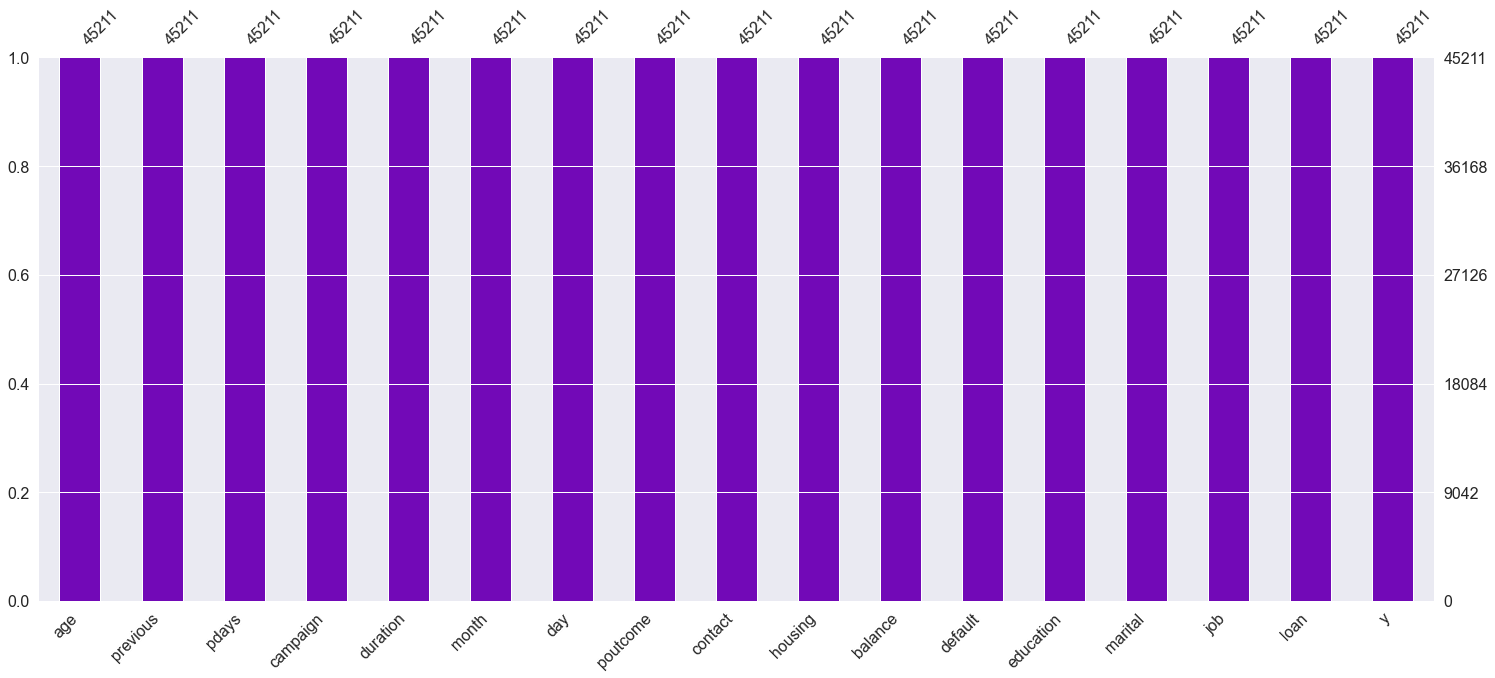

In [5]:
msno.bar(df,sort='ascending',color = '#7209b7');
plt.show()

No missing values found so far.

#### Exploratory Data Analysis

In [6]:
#checking for dataset imbalance
df['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

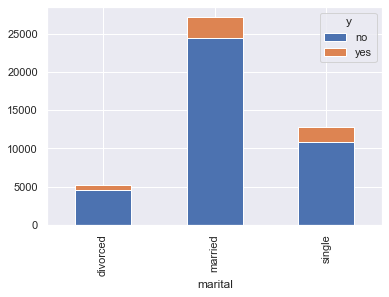

In [7]:
pd.crosstab(df.marital,df.y).plot(kind='bar',stacked=True);

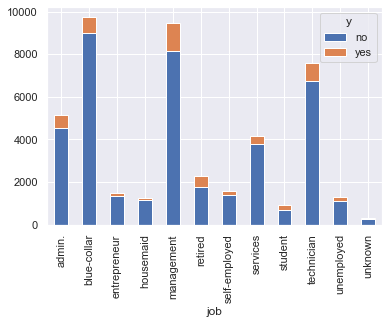

In [8]:
pd.crosstab(df.job,df.y).plot(kind='bar',stacked=True);

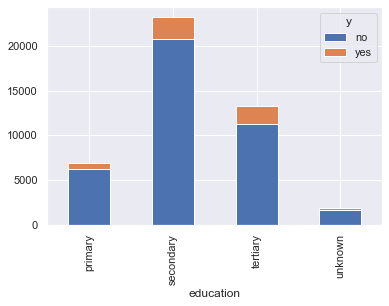

In [9]:
pd.crosstab(df.education,df.y).plot(kind='bar',stacked=True);

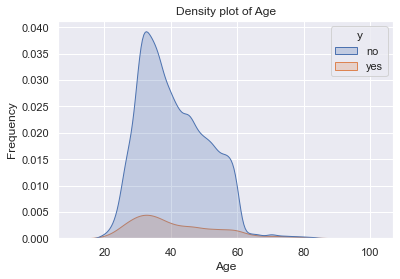

In [10]:
sns.kdeplot(data=df,x='age',hue='y',shade=True);
plt.title('Density plot of Age')
plt.xlabel('Age')
plt.ylabel('Frequency');

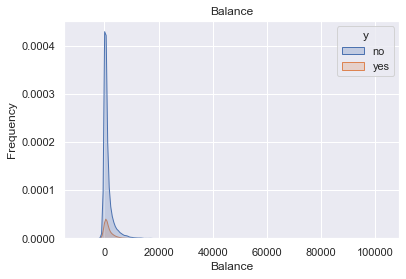

In [11]:
sns.kdeplot(data=df,x='balance',hue='y',shade=True);
plt.title('Balance')
plt.xlabel('Balance')
plt.ylabel('Frequency');

#### Feature Engineering and Scaling

In [12]:
#labelencoding multiple categories
category = ['job','education','marital','housing','loan','default','poutcome','contact','y']
labelencoder= LabelEncoder()
df[category] =df[category].apply(labelencoder.fit_transform)
df[category].head(2)

,job,education,marital,housing,loan,default,poutcome,contact,y
0,4,2,1,1,0,0,3,2,0
1,9,1,2,1,0,0,3,2,0


In [13]:
from sklearn.feature_selection import RFE
logreg = LogisticRegression()

X_feat=df[category].iloc[:,:-1]
y=df.y

rfe = RFE(logreg)
rfe = rfe.fit(X_feat,y)
print(rfe.support_)
print(rfe.ranking_)

[False False False  True  True  True False  True]
[5 4 2 1 1 1 3 1]


By using Recursive Feature Elimination(RFE) as a feature selection method, we can include the features whose support outcome is 1 into our model.

Since the dataset is heavily imbalanced, we will apply the SMOTE technique to increase the number of samples that are missing in the target variable.

In [14]:
X=df[category][['housing','loan','default']]
y=df[category]['y']
os= SMOTE(random_state = 1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=1,stratify=y)
os_data_X,os_data_y = os.fit_resample(X_train,y_train)

Model Deployment

In [15]:
#modelling
logreg= LogisticRegression(C=100)
logreg.fit(os_data_X,os_data_y)

LogisticRegression(C=100)

In [16]:
#prediction
y_pred= logreg.predict(X_test)
print('Training set accuracy: {:.2f}%'.format(logreg.score(os_data_X,os_data_y)*100))
print('Testing set accuracy: {:.2f}%'.format(logreg.score(X_test,y_test)*100))

Training set accuracy: 62.31%
Testing set accuracy: 65.04%


#### Model Evaluation

In [17]:
df['y'].head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

In [18]:
print(logreg.predict_proba(X_test)[:5])

[[0.54342184 0.45657816]
 [0.58861145 0.41138855]
 [0.38041685 0.61958315]
 [0.58861145 0.41138855]
 [0.58861145 0.41138855]]


In [19]:
print(confusion_matrix(y_test,y_pred))

[[6580 3401]
 [ 550  772]]


In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.66      0.77      9981
           1       0.18      0.58      0.28      1322

    accuracy                           0.65     11303
   macro avg       0.55      0.62      0.53     11303
weighted avg       0.84      0.65      0.71     11303



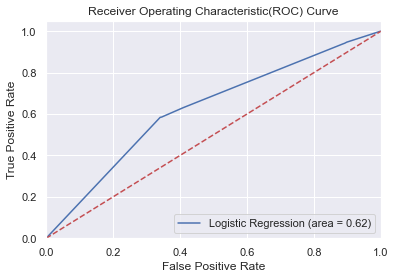

In [21]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic(ROC) Curve')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

#### Model Interpretation
1. Not a poor performance, the model accuracy can definitely be improved.
2. The model reflects lower accuracy since its heavily imbalanced.

References:

https://www.ibm.com/topics/logistic-regression


Data source:

https://archive.ics.uci.edu/ml/datasets/bank+marketing